In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25)

my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8653862880031117

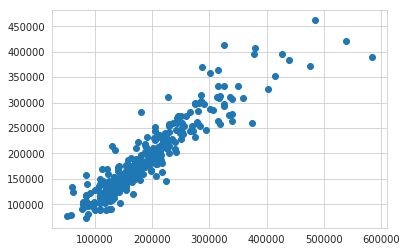

In [12]:
from sklearn.ensemble import RandomForestRegressor

est1 = RandomForestRegressor()
est1.fit(X_train, y_train)
pred1 = est1.predict(X_test)

plt.scatter(y_test, pred1)
est1.score(X_test, y_test)

0.8705238363483807

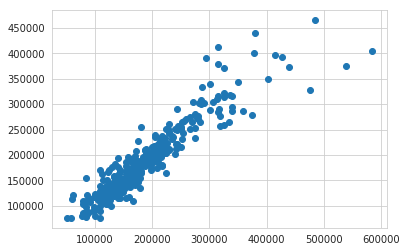

In [13]:
from xgboost import XGBRegressor

est2 = XGBRegressor()
est2.fit(X_train, y_train, verbose=False)
pred2 = est2.predict(X_test)

plt.scatter(y_test, pred2)
est2.score(X_test, y_test)